# Hypothesis Testing and the Central Limit Theorem

## Law of Large Numbers

The weak law of large numbers states that:

If $X_1, X_2, ..., X_n$ is a sequence of iid random variables with expected value $E(X_1) = E(X_2) = ... = E(X_n) = \mu$, then

$\overline{X_n} \xrightarrow{p} \mu$ when $n \xrightarrow{} \infty$

where $\overline{X_n} = \frac{\sum_{n=1}^n X_n}{n}$

This means that the distribution of the sample mean becomes more concentrated around $\mu$ as *n* gets large.

In [1]:
# Assume we have a discrete uniformly distributed variable with a = 0 and b = 10
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['figure.figsize'] = (12,6)

In [11]:
# Create a sum of the values
summed = 0

# Create the mean of the values
averaged = 0

# Create n
n = 1000

# Create history of the means
mean_history = []

for i in range(1, n+1):
    x = np.random.randint(0, 11)
    summed += x
    averaged = summed/i
    mean_history.append(averaged)

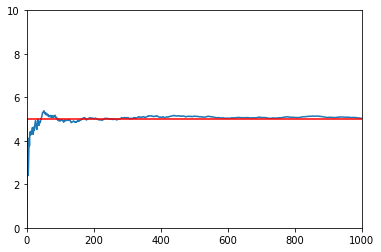

In [12]:
plt.plot(range(len(mean_history)), mean_history)
plt.axis(xmin=0, xmax=n, ymin=0, ymax=10)
plt.axhline(5, c='r')

## Central Limit Theorem

Suppose $X_1, ..., X_n$ are iid random variables with mean $\mu$ and variance $\sigma^2$. The central limit theorem says that $\overline{X_n}$ converges in distribution to a Normal with mean $\mu$ and variance $\frac{\sigma^2}{n}$.

$\overline{X_n} \xrightarrow{d} N(\mu, \frac{\sigma^2}{n})$

In [19]:
# Create a list of the means
sample_means = []

nr_of_samples = 1000
sample_size = 100
for i in range(nr_of_samples):
    # Create a summed variable for each sample
    summed = 0
    for _ in range(sample_size):
        summed += np.random.randint(0, 11)
    sample_means.append(summed/100)

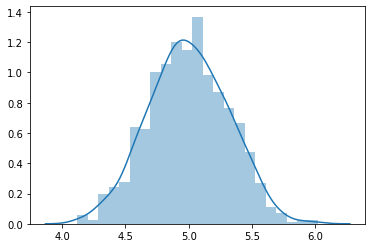

In [20]:
sns.distplot(sample_means)
plt.show()

## Hypothesis Testing

A hypothesis is a statement about a population parameter.

Let's come up with a hypothesis:

### Hypothesis

The average IQ of the Gradient Garlics is higher than the population average.

### Assumptions

- the true mean of the IQ
- the true standard deviation is 100
- IQs are normally distributed

How do we answer the question? The idea is really to look whether we can, under the assumption of no difference, say that the value observed is unlikely or not.

In [21]:
iqs = [150, 150, 150, 150]

In [22]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,6)

In [23]:
def plot_test(dist, mean, std, nstd, c='blue', rejection_region=True, one_sided=False, ax=None):
    '''
    Create a plot visualizing what we are actually testing for.
    
    Parameters:
    -----------
    dist:      Distribution of the test statistic
    mean:      The mean of the distribution
    std:       The standard deviation of the test statistic
    nstd:      The value of the test statistic at which to cut off
    one_sided: If test should be one-sided, set to True
    ax:        Axis in the plot
    
    Returns a plot
    '''
    y = np.arange(mean-4*std, mean+4*std, 0.1)
    x = dist.pdf(y, mean, std)

    sns.lineplot(y, x, ax, c=c)
    plt.title('IQ-distribution', fontsize=15)
    plt.xlabel('Value of the IQ-test')
    plt.ylabel('Probability')
    plt.ylim(-0.002, 0.03)
    if rejection_region:
        if not one_sided:
            plt.axvline(mean-nstd*std, c='r')
        plt.axvline(mean+nstd*std, c='r')

/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


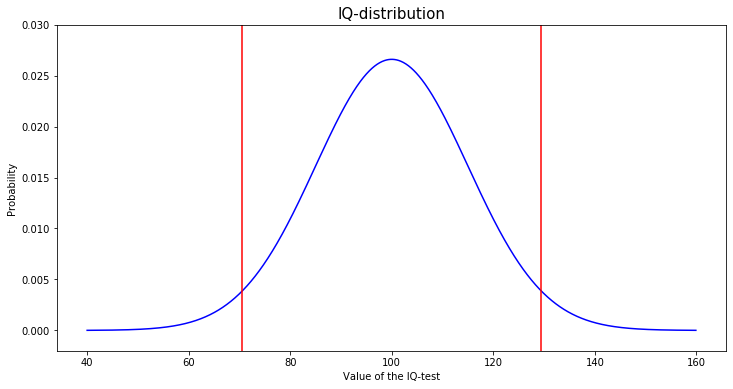

In [25]:
plot_test(stats.norm, 100, 15, 1.96, rejection_region=True)

### 1) Formulate a null hypothesis

In hypothesis testing we start with some default theory called the null hypothesis $H_0$. Usually the $H_0$ is states the opposite of our actual hypothesis. We can also think of the null hypothesis as a status quo.

We inspect the data and check if we have sufficient evidence to reject the null hypothesis.
If not, we fail to reject the null hypothesis.

### Null Hypothesis

The average IQ of the Gradient Garlics is equal to the population average.

**$H_0$:** $\overline{X_n} \leq \mu_{pop}$

### 2) Formulate an alternative hypothesis

The alternatative hypothesis represents our actual hypothesis or the hypothesis that an effect exists.

**$H_a$:** $\overline{X_n} > \mu_{pop}$

**The null hypothesis and the alternative hypothesis do not play a symmetric role!** The data is only used to try to disprove the null hypothesis.

The formulation of the hypothesis defines whether we are looking at a *one-sided* or a *two-sided* test.

In [ ]:
# two-sided test
plot_test(stats.norm, 100, 15, 1.96)
plt.title('Two-sided test')
plt.show()
# one-sided test
plot_test(stats.norm, 100, 15, 1.64, one_sided=True)
plt.title('One-sided test')
plt.show()

### 3) Define an acceptance level $\alpha$

The acceptance level $\alpha$ defines a threshold. This threshold describes the maximum probability of rejecting the null hypothesis you are willing to accept given the null hypothesis is actually true.<br>
It describes the probability of encountering a **Type I** error (False Negative) of the test **if** the null hypothesis is true.

$\alpha$ = P(reject $H_0$ | $H_0$ is true)

The probability of a **Type II** error (False Positive) is denoted $\beta$ **if** the alternative hypothesis is true.

$\beta$ = P(fail to reject $H_0$ | $H_0$ is false)

The **power of a test** is defined as $min(1-\beta)$.

The most common acceptance levels $\alpha$ are 5% or 1%.

### 4) Compute the Test Statistic

A value derived from the data and the null hypothesis to be compared with some fixed value. It determines whether we reject the null hypothesis or we fail to reject it. **If the null hypothesis is true** the test statistic follows a standard normal distribution.

$T_n = \sqrt{n}*\frac{\overline{x} - 100}{\sigma} \stackrel{H_0}{\sim} N(0,1)$

In [ ]:
# Calculate the actual test statistic for our example

### 5) Look up the probability in the probability table

The test statistic constructs the value of the test under the assumption that the null hypothesis is true. If the value of the test statistic is to far from the mean of the test statistic, then we reject the null hypothesis. If it is not far, we fail to reject it.

What do we mean by far? The **acceptance level** defines what we mean by far.

### 6) Interpretation

If the null hypothesis is true, the probability of observing a sample with the mean we observed is .... Btw. this is what we call the **p-value**. It is the lowest acceptance level at which we would have rejected the null hypothesis.
This is higher/lower than our acceptance level (for Type I errors). We reject/fail to reject the null hypothesis.

## Why do Juan's statistician colleagues calculate the number of rats?

This has to do with the **power of the test**. It is the probability of rejecting $H_0$ if $H_0$ is false.<br>
We fixed the probability of the Type I errors (False Negatives). But what about the Type II errors (False positives)?

What does the Type II error depend on?<br>

In our case it is :

1 - $\beta$ = 1 - P(fail to reject $H_0$| $H_0$ is false) = 1 - P($\sqrt{n}\frac{\overline{x_n} - \mu}{S_n} \leq \Phi_{1-\alpha})$

- The choice of the hypothesis
- $\alpha$
- $\mu$
- $\sigma$
- n

Which of these parameters can we influence most easily?

What n does intuitively is making $x_n$ more accurate, making $S_n$ more accurate. Mainly it is decreasing the sample variance and thereby reducing uncertainty.

In [ ]:
plot_test(stats.norm, 100, 15, nstd=1.64, one_sided=True)
plot_test(stats.norm, 115, 15, nstd=1.64, rejection_region=False, c='g')
plt.legend(['population', 'rejection-line', 'gradient-garlics'])
plt.show()

## What if our assumptions do not hold?

The test we looked at right now was a Z-test. It was based on the assumptions that the random variable follows a normal distribution, that we know the population mean and the population standard deviation. What if one of these assumptions does not hold?

### Non-normality

If we have non-normal data but we know the population parameters (mean and standard deviation), the only thing that changes is the distribution of our test statistic. E.g., if our variable was binomially distributed we would have to look at the probability table of the binomial distribution.

If we do not know the distribution of our data but our dataset is large enough, we can use the Central Limit Theorem to assume normality.

### Non-knowledge of population parameters

If we do not know the true population standard deviation, we can estimate it using our sample standard deviation

$S_x = \frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n-1}$

This will increase uncertainty of our results. Even if the variable is truely normally distributed, the test statistic will follow Student's t-distribution. It has wider tails than the normal.

In [ ]:
df = 3.00
x = np.linspace(stats.t.ppf(0.01, df), stats.t.ppf(0.99, df), 100)

sns.lineplot(x, y=stats.t.pdf(x, df), label='t-distribution')
sns.lineplot(x, y=stats.norm.pdf(x, 0, 1), label='normal')

Student's t-distribution approximates the normal distribution if n becomes large.

## Other tests

- Two-sample t-test: Compare two samples against each other

$\frac{\overline{x_1} - \overline{x_2}}{\frac{S_1}{\sqrt{n_1}} + \frac{S_2}{\sqrt{n_2}}}$

- Paired T-test: Compare dependent observations with each other
- F-test: Test multiple hypotheses at the same time
- Likelihood-Ratio Test

# Beware

- Dead salmon shows brain activity: https://blogs.scientificamerican.com/scicurious-brain/ignobel-prize-in-neuroscience-the-dead-salmon-study/

- Last Week Tonight P-Hacking: https://www.youtube.com/watch?v=FLNeWgs2n_Q

- Dance of the p-values: https://www.youtube.com/watch?v=5OL1RqHrZQ8